# Lecture 5 Part 1 - The Bias-Variance Trade-Off & The Curse of Dimensionality

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [ ]:
def NoisySinusoidalData(N, a, b, sigma):
    '''Generates N data points in the range [a,b) sampled from a sin(2*pi*x) 
    with additive zero-mean Gaussian random noise with standard deviation sigma'''
    
    # N input samples, evenly spaced numbers between [a,b) incrementing by 1/N
    x = np.linspace(a,b,N)
    
    # draw N sampled from a univariate Gaussian distribution with mean 0, sigma standard deviation and N data points
    noise = np.random.normal(0,sigma,N)
    
    # desired values, noisy sinusoidal
    t = np.sin(2*np.pi*x) + noise
    
    return x, t

In [ ]:
# Generate input samples and desired values
N_train = 50 # number of data samples for training
N_test = 20 # number of data samples for test

a, b = [0,1] # data samples interval

sigma_train = 0.4 # standard deviation of the zero-mean Gaussian noise -- training data
sigma_test = 0.1 # standard deviation of the zero-mean Gaussian noise -- test data

x_train, t_train = NoisySinusoidalData(N_train, a, b, sigma_train) # Training Data - Noisy sinusoidal
x_true, t_true = NoisySinusoidalData(N_train, a, b, 0) # True Sinusoidal - in practice, we don't have the true function
x_test, t_test = NoisySinusoidalData(N_test, a, b, sigma_test) # Test Data - Noisy sinusoidal

plt.figure(figsize=(10,7))
plt.scatter(x_train, t_train, c='b', linewidths=3, label = 'Training Data')
plt.plot(x_true, t_true, 'g', linewidth=4, label = 'True Mapper')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, $x$',size=15)
plt.ylabel('Target Labels, $t$',size=15);

In [ ]:
def PolynomialRegression(x,t,M):
    '''Fit a polynomial of order M to the data input data x and desire values t'''
    # Compute feature matrix X with polynomial features
    X = np.array([x**m for m in range(M+1)]).T #computes the phi(x) = [x^0, x^1, ...., x^M]
    # Compute the solution for the parameters w
    w = np.linalg.inv(X.T@X)@X.T@t # Optimal set of parameters w
    # Compute model prediction
    y = X@w
    return w, y

def PolynomialRegression_reg(x,t,M,lam):
    # Compute feature matrix X with polynomial features
    X = np.array([x**m for m in range(M+1)]).T
    # Compute the solution for the parameters w
    w = np.linalg.inv(X.T@X + lam*np.eye(M+1))@X.T@t
    # Compute model prediction
    y = X@w
    return w, y

In [ ]:
M = 20
lam = 0.001

w, y, = PolynomialRegression(x_train,t_train,M) 
wreg, yreg = PolynomialRegression_reg(x_train,t_train,M,lam) 

fig=plt.figure(figsize=(10,6))
plt.scatter(x_train,t_train, label='Training Data')
plt.plot(x_train,y,'r', label = 'Polynomial Regression')
plt.plot(x_train,yreg, 'b',label = 'Polynomial Regression w/ Regularizer')
plt.plot(x_true,t_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

In [ ]:
def PolynomialRegression_test(x,M,w):
    # Feature matrix for test set
    X = np.array([x**m for m in range(M+1)]).T
    
    # Prediction for test set
    y = X@w
    
    return y

In [ ]:
# Prediction for test set using non-regularized model
y_test = PolynomialRegression_test(x_test, M, w)

# Prediction for test set using regularized model
y_test_reg = PolynomialRegression_test(x_test, M, wreg)

# Plotting
fig=plt.figure(figsize=(10,6))
plt.plot(x_true, t_true, '--g', label = 'True Function')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.plot(x_test,y_test,'r', label = 'Polynomial Regression')
plt.plot(x_test,y_test_reg, 'b',label = 'Polynomial Regression w/ Regularizer')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Test Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

### Fine-tuning the Hyperparameters

The hyperparameters of ridge regression are the model order $M$ and the regularizer coefficient $\lambda$.

How would you choose which value to use? -- Cross-validation.

---

# Performance Measures

In order to determine if the model is able to **generalize** to a **validation set**, we need to determine a **performance measure**.

Which _quantitative_ measure would you use to compare model performances?

## Error Measures

Error measures are always a good start for **regression** tasks. Some examples include:

* **Mean Squared Error (MSE)** - best when the data does not have outliers. The MSE will penalize outliers heavily.

* **Mean Absolute Error (MAE)** - best when you suspect data has outliers.

In [ ]:
# Residual error for Training data for polynomial regression without and with regularizer
error_train = t_train - y 
error_train_reg = t_train - yreg 

# Residual error for Test data for polynomial regression without and with regularizer
error_test = t_test - y_test
error_test_reg = t_test - y_test_reg

# Error Measures
print('Mean Squared Error \n')
print('Training Set')
print('Without regularizer: ', np.mean(error_train**2))
print('With regularizer: ', np.mean(error_train_reg**2),'\n')
print('Test Set')
print('Without regularizer: ', np.mean(error_test**2))
print('With regularizer: ', np.mean(error_test_reg**2),'\n')
print('----------------------------------------------------------------')
print('Mean Absolute Error \n')
print('Training Set')
print('Without regularizer: ', np.mean(np.abs(error_train)))
print('With regularizer: ', np.mean(np.abs(error_train_reg)),'\n')
print('Test Set')
print('Without regularizer: ', np.mean(np.abs(error_test)))
print('With regularizer: ', np.mean(np.abs(error_test_reg)),'\n')

Other error-based measures can be considered, e.g., normalized mean squared error (NMSE), normalized mean absolute error (NMAE), etc.

## Q-Q Plot

We can also use the **Quantile-Quantile (Q-Q)** plot to assess qualitative measures of goodness-of-fit.

* The Q-Q plot help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential, or if two sets of samples were drawn from the same distribution. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption. It's just a visual check, not an air-tight proof, so it is somewhat subjective. But it allows us to see at-a-glance if our assumption is plausible, and if not, how the assumption is violated and what data points contribute to the violation.

* What are *quantiles*? These are often referred to as *percentiles*. These are points in your data below which a certain proportion of your data fall which are captured in the Cumulative Distribution Function (CDF) of a random variable. For example, imagine the classic bell-curve standard Normal distribution with a mean of 0. The 0.5 quantile, or 50th percentile, is 0. Half the data lie below 0. That's the peak of the hump in the curve. The 0.95 quantile, or 95th percentile, is about 1.64. 95 percent of the data lie below 1.64.

In [ ]:
base = np.linspace(min(t_test),max(t_test),100)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1); plt.scatter(np.sort(t_test), np.sort(y_test))
#NOTE: the true values and predictions are sorted because we are 
#inferring quantiles of the underlying probabilistic model from data samples
plt.plot(base,base,'r')
plt.xlabel('Target Quantiles', size=15)
plt.ylabel('Estimated Quantiles', size=15)
plt.title('Polynomial Model without regularizer',size=20)

plt.subplot(1,2,2); plt.scatter(np.sort(t_test), np.sort(y_test_reg))
#NOTE: the true values and predictions are sorted because we are 
#inferring quantiles of the underlying probabilistic model from data samples
plt.plot(base,base,'r')
plt.xlabel('Target Quantiles', size=15)
plt.ylabel('Estimated Quantiles', size=15)
plt.title('Polynomial Model with regularizer',size=20);

And then take a summative **quantitative** measure, namely the **coefficient of determination**.

In [ ]:
import scipy.stats as stats

print('Polynomial Regression Without Regularization - Test Set')
m, b, r, p, _ = stats.linregress(np.sort(t_test), np.sort(y_test))
print('Coefficient of Determination: ',r**2)
print('Slope: ',m)
print('Intercept: ',b)
print('p-value: ', p)
print('-------------------')
print('Polynomial Regression With Regularization - Test Set')
m, b, r, p, _ = stats.linregress(np.sort(t_test), np.sort(y_test_reg))
print('Coefficient of Determination: ',r**2)
print('Slope: ',m)
print('Intercept: ',b)
print('p-value: ', p)

For most applications, we want a model with a coefficient of determination $r^2\geq99\%$.

In this example, the exponential performs better than the polynomial model in the test set.

## Other Performance Measures

Performance of an algorithm can be determined using a variety of statistical goodness-of-fit measures. 

* For regression tasks this includes error-based measurements, hypothesis tests, Q-Q plots.
* For classification tasks this includes error rate, accuracy, ROC curves, performance-recall curves.

But it can also be in terms of:
1. Risk,
2. Training time,
3. Training storage/memory,
4. Testing time,
5. Testing storage/memory,
6. Interpretability, namely, whether the method allows knowledge extraction which can be checked and validated by experts, and
7. computational complexity.

---

## K-Fold Cross-Validation

The technique of k-fold cross-validation, illustrated below for the case of $k=4$, involves taking the available data and partitioning it into $k$ groups (in the simplest case these are of equal size). Then $k-1$ of the groups are used to train a set of models that are then evaluated on the remaining group. This procedure is then repeated for all $k$ possible choices for the held-out group, indicated in the picture below by the red blocks, and the performance scores from the runs are then averaged.

$K$ is typically 10 or 30. As $K$ increases, the percentage of training instances increases and we get more robust estimators, but the validation set becomes smaller. Furthermore, there is the cost of training the classiﬁer $K$ times, which increases as $K$ is increased. As $N$ increases, $K$ can be smaller; if $N$ is small, $K$ should be large to allow large enough training sets.

In [ ]:
from IPython.display import Image
Image('figures/Kfold CV.png',width=400)

In [ ]:
from sklearn.model_selection import KFold

KFold?

**Goal:** find the best value for the **hyperparameters** $M$ (model order) and $\lambda$ (regularization trade-off parameter).

Let's use **4-fold cross-validation** on this data:

In [ ]:
k = 4 # number of folds

kf = KFold(n_splits=k,shuffle=True)
kf

In [ ]:
# Split training feature matrix into training and validation sets

f=1
for train_index, validation_index in kf.split(x_train):
    print('Fold ', f)
    print('The training set has ', train_index.shape[0],' samples')
    print('Their index locations are: ', train_index)
    print('The validation set has ', validation_index.shape[0],' samples')
    print('Their index locations are: ', validation_index,'\n\n')
    f+=1

In [ ]:
# Set of values for lambda to explore
M_vals = range(1,21)
lam_vals= np.arange(0.1,1.1,0.1)

for M in M_vals:
    for lam in lam_vals:
        
        print('M Value = ',M)
        print('Lambda Value = ',lam)
        
        # For each training/validation split
        f=1
        
        #initialize performance measures
        MSE_train_avg,MSE_val_avg = 0, 0
        
        for train_index, validation_index in kf.split(x_train):
            print('\nFold ',f)
            
            # Select training set using the indices found from kf.split
            x_train2, x_validation = x_train[train_index], x_train[validation_index]
            
            # Select validation set using the indices found from kf.split
            t_train2, t_validation = t_train[train_index], t_train[validation_index]
            
            # Training model with training set
            w, y_train = PolynomialRegression_reg(x_train2, t_train2, M, lam)
            
            # Evaluate trained model in validation set
            y_val = PolynomialRegression_test(x_validation, M, w)
            
            # Performance Measure
            MSE_train = np.mean((t_train2-y_train)**2)
            MSE_val   = np.mean((t_validation-y_val)**2)
            
            # Average performance measure
            MSE_train_avg = MSE_train_avg+MSE_train
            MSE_val_avg = MSE_val_avg+MSE_val
            print('MSE Training = ', MSE_train)
            print('MSE Validation = ', MSE_val)
            f+=1
            
        print('\nAverage Performance in Training = ', MSE_train_avg/k)
        print('Average Performance in Validation = ', MSE_val_avg/k)
        print('-----------------------------------------------------\n')

#### Discussion

* We select the set of hyperparameters $\{M,\lambda\}$ with the best performance score (e.g. smallest MSE or largest $r^2$).

* If the value of the hyperparameter falls at the edge of provided range of values, it is appropriate to expand the range of values for further exploration.

* Other performance measures can be used, for example, the coefficient of determination of the Q-Q plot for regression tasks, or accuracy score for classification tasks.

---

<div class="alert alert-info">
    <b>No Free Lunch Theorem</b> 

The No Free Lunch Theorem states that there is no single learning algorithm that in any domain always induces the most accurate learner. The usual approach is to try many and choose the one that performs the best on a separate validation set.
    
For any learning algorithm, there is a dataset where it is very accurate and another dataset where it is very poor. When we say that a learning algorithm is good, we only quantify how well its inductive bias matches the properties of the data.
</div>

---

# The Bias-Variance Trade-Off

Regardless of the form and number of the basis functions, we still face the problem of **overfitting**. In fact, this is true for any ML model.

The problem of searching for *optimal* model complexity has been extensively studied; in fact, we are *simply* searching for a level of complexity that fits the data *well* yet *not too well*. This phenomenon can be summarized by the **bias-variance trade-off** of complexity.

<div class="alert alert-info">
    <b>The Bias-Variance Trade-Off</b> 

The bias-variance trade-off is a way of analyzing a learning algorithm's expected generalization error with respect to a particular problem as a sum of three terms, the bias, variance, and a quantity called the irreducible error, resulting from noise in the problem itself.
</div>

Consider the objective function:

\begin{align*}
J(\mathbf{x},\mathbf{w}) = \frac{1}{2} \Vert \mathbf{t} - \mathbf{y}\Vert_2^2
\end{align*}

where $\mathbf{y}=f(\mathbf{w},\phi(\mathbf{x}))$ and the function $f(x)$ is a linear function of the form $ \mathbf{y}=f(\mathbf{w},\phi(\mathbf{x}))= \sum_{j=0}^{M} w_j\phi_j(\mathbf{x})$.

For some dataset $D$, we can make a model prediction $\mathbf{y}$ and compute the objective function value. Hence, we can treat its values as random variable and take the expected value as a function of the dataset $D$:

\begin{align*}
E\left[J(\mathbf{x},\mathbf{w})\right] &= E\left[\frac{1}{2} \Vert \mathbf{t} - \mathbf{y}\Vert_2^2\right] \\
&=E\left[(\mathbf{t} - \mathbf{y})^2\right]
\end{align*}

where $\mathbf{y}$ is the model and $\mathbf{t}$ is the desired response. 

From the experimental design section, we learned that this quantity depends on the particular data set $D$. And so, we can take its average over the ensemble of data sets.

* In practice we really only have access to $E_D[\mathbf{y}]$
* But $\mathbf{y}$ here, is simply representing the model *if* we had an *infinite* amount of data and could effectively represent it.

If we add and subtract the quantity $E_D[\mathbf{y}]$, we obtain:

\begin{align*}
E\left[(\mathbf{t} - \mathbf{y})^2\right] &= E\left[(\mathbf{y}-\mathbf{t})^2\right] \\
&= E\left[(\mathbf{y} - E_D[\mathbf{y}] + E_D[\mathbf{y}] - \mathbf{t})^2\right]\\
&= E\left[(\mathbf{y} - E_D[\mathbf{y}])^2\right] + E\left[(E_D[\mathbf{y}] - \mathbf{t})^2\right] + E\left[2(\mathbf{y} - E_D[\mathbf{y}])(E_D[\mathbf{y}] - \mathbf{t})\right]\\
&= \text{variance } +  \text{bias }^2 +  \text{irreducible error} 
\end{align*}

---

# The Curse of Dimensionality 

The Curse of Dimensionality illustrates various phenomena that arise when we work with high-dimensional data spaces that would not otherwise occur in lower-dimensional settings (such as the 3-dimensional space).

> ## Our intuitions do not hold in high-dimensional spaces 🤔

Let's illustrate this with two examples.

## Example 1: Volume of a Crust

Consider two embedded spheres, $S_1$ and $S_2$, where sphere $S_1$ has radius $r$, sphere $S_2$ has radius $r-\epsilon$, with $0<\epsilon<r$.

Let's calculate the ratio between the volume of the crust and the volume of the outer sphere $S_1$:

\begin{align*}
\text{ratio} = \frac{V_{crust}}{V_{S_1}} = \frac{V_{S_1} - V_{S_2}}{V_{S_1}}
\end{align*}

* The $D$-dimensional [volume of a sphere of radius $r$ in $D$-dimensional space](https://en.wikipedia.org/wiki/Volume_of_an_n-ball) is: $V = \frac{r^D \pi^{\frac{D}{2}}}{\Gamma\left(\frac{D}{2}+1\right)}$, then

\begin{align*}
\text{ratio} &= \frac{V_{S_1} - V_{S_2}}{V_{S_1}} \\
&= 1-\frac{V_{S_2}}{V_{S_1}} \\
&= 1-\frac{\frac{(r-\epsilon)^D \pi^{\frac{D}{2}}}{\Gamma\left(\frac{D}{2}+1\right)}}{\frac{r^D \pi^{\frac{D}{2}}}{\Gamma\left(\frac{D}{2}+1\right)}} \\
&= 1 - \frac{(r-\epsilon)^D}{r^D}\\
&= 1 - \frac{r^D\left(1-\frac{\epsilon}{r}\right)^D}{r^D}\\
&= 1 - \left(1-\frac{\epsilon}{r}\right)^D
\end{align*}

* For a fixed value for $\epsilon$, a fixed radius $r$ and $\epsilon<r$, what happens as $D$ increases?

In [ ]:
# Crust volume between spheres with epsilon different radii and increasing dimensionality

r = 1 # radius of outer sphere
eps = 0.001 # epsilon value
D = range(1,10000) # dimensionality
RatioVol = [1-(1-eps/r)**d for d in D] # ratio of the volume as a function of dimensionality D
plt.plot(D, RatioVol) # plotting results
plt.ylabel('ratio$=1 - (1 - \epsilon/r)^D$',size=15)
plt.xlabel('(Feature Space) Dimensionality, D',size=15);

> ### 🤯 Let's see another example!

## Example 2: Unit Porcupine

Consider the unit porcupine which is represented as a unit hypersphere inscribed within a unit hypercube.

Recall that the $D$-dimensional volume of a $D$-dimensional cube with radius $r$ is $(2r)^D$.

* What happens to the ratio between the volume of the sphere and the volume of the cube as dimensionality $D$ increases?

\begin{align*}
\frac{V(\text{sphere})}{V(\text{cube})} &= \frac{\frac{r^D \pi^{\frac{D}{2}}}{\Gamma\left(\frac{D}{2}+1\right)}}{(2r)^D}\\
&= \frac{r^D \pi^{\frac{D}{2}}}{(2r)^D\Gamma\left(\frac{D}{2}+1\right)}\\
&= \frac{\pi^{\frac{D}{2}}}{2^D\Gamma\left(\frac{D}{2}+1\right)}
\end{align*}

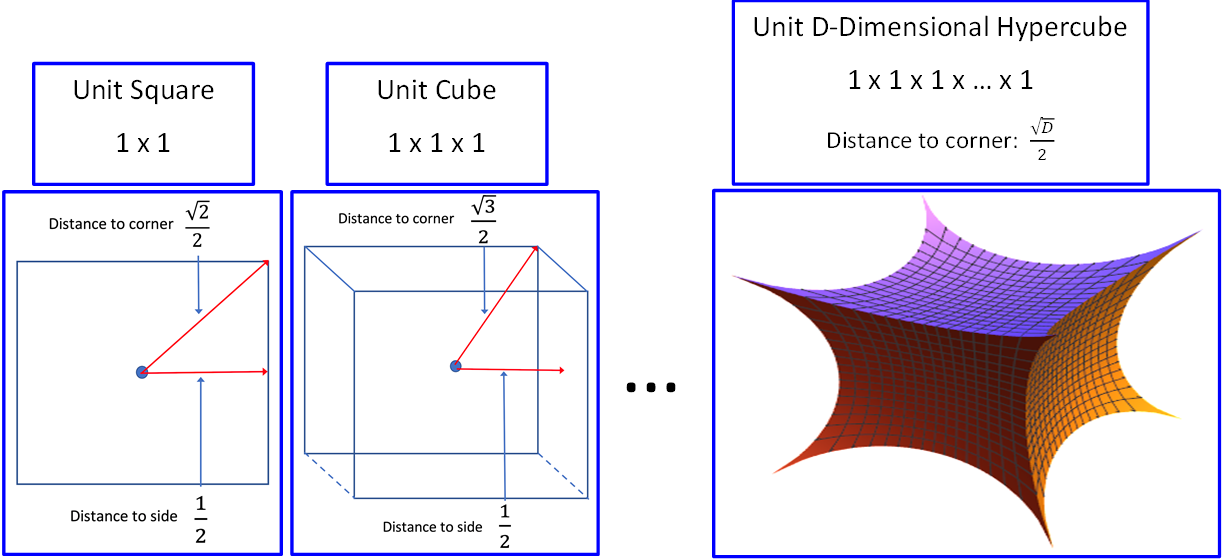

In [1]:
from IPython.display import Image
Image('figures/hypercube.png',width=1000)

In [ ]:
# The Unit Porcupine (the unit hyper-sphere inscribed within the unit hyper-cube)

import math

D = range(1,100) # dimensionality, D
V = [np.pi**(i/2)/(2**i*math.gamma(i/2 + 1)) for i in D] # ratio as a function of dimensionality D
dist_to_Corner = [math.sqrt(d)/2 for d in D] # distance 

# plotting
plt.figure(figsize=(15,5))
plt.subplot(1,2,1); plt.plot(D, V) 
plt.title('Ratio of Volume',size=15)
plt.xlabel('Dimensions, D',size=15)

plt.subplot(1,2,2)
plt.plot(D, dist_to_Corner) 
plt.title('Distance to Corner of the Cube',size=15)
plt.xlabel('Dimensions, D',size=15);

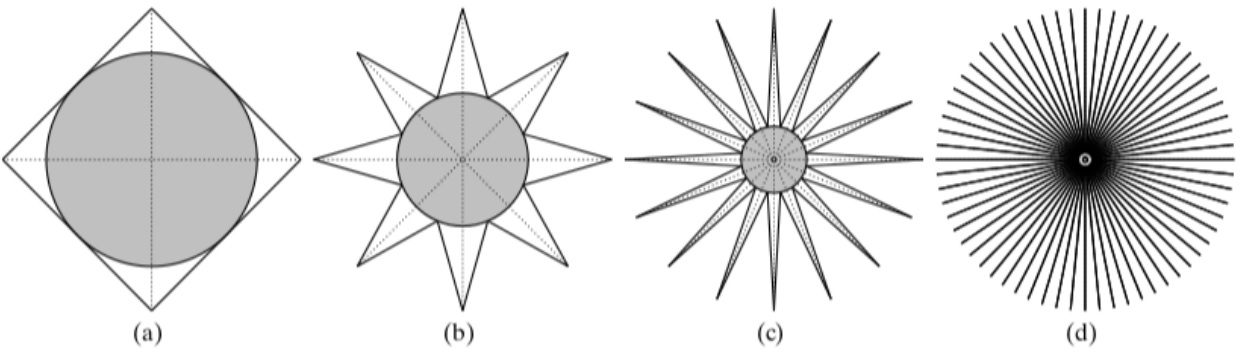

In [3]:
Image('figures/Unit Porcupine.jpg',width=800)

> ### If the Curse of Dimensionality could talk, I imagine it would sound like this...

In [2]:
from IPython.display import Audio
Audio("EvilLaugh.mp4", autoplay=False)

## Discussions

In the unit porcupine example, for higher-dimensionality $D$, all of the volume will reside in the "corners". So, distances between neighboring points is extremely large. The notion of **similarity** as measure by distances becomes a challenge.

As the dimensionality of the feature space increases, we need exponentially more data in order to explain a highly increasing volume.

We need to be careful choosing a model as that choice "injects" what we want the data to look like or follow a specific behavior. For example, in higher-dimensions, the tails of a Gaussian density function will become highly dense.

Always employ the **Occam's Razor** principle: the simplest model that works for our data is usually the most appropriate and sufficient. Model simplicity can mean different things, but we can consider a model to be complex if it has too many hyperparameter values to configure. 

When we are in a high-dimensional input space (such as images), much of that space is empty. The input data can be represented in only a few *degrees of freedom* of variability. We say that the data in *embedded* in a **manifold** of equal dimensionality as the degrees of freedom (which is drastically smaller than the input space dimensionality). We will study a few dimensionality reduction and manifold learning techniques later on in this course.

And again, intuitions or assumptions do not always hold in higher dimensions.

---